In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
%matplotlib inline

### Сгенерируйте примеры из распределения



In [241]:
expone_distrib=sts.expon()
expone=expone_distrib.rvs(100)
expone

array([2.03089386e-01, 1.08877440e+00, 1.42653903e+00, 1.21361789e-01,
       3.96375563e+00, 4.98098031e-01, 2.36921540e-01, 3.48037020e+00,
       6.01021398e-01, 2.00426739e+00, 2.16023319e-01, 3.87791344e-01,
       6.69025702e-01, 1.82437152e+00, 2.48624459e-01, 1.84600109e-01,
       8.14922761e-01, 3.85468802e-01, 6.07626995e-01, 1.64405767e+00,
       8.61681579e-01, 3.45222488e+00, 1.95346445e+00, 1.12270672e-01,
       2.99749428e+00, 2.79098756e+00, 2.90663319e-01, 2.71335683e+00,
       5.89044861e+00, 1.13801845e+00, 1.63496298e-01, 2.91821607e+00,
       1.50474004e+00, 6.62705127e-01, 1.32882496e+00, 1.09372450e+00,
       7.50146931e-01, 2.45568537e+00, 3.77554424e-01, 5.05993230e-01,
       2.28262596e+00, 7.35125551e-01, 2.00674801e+00, 1.76031030e+00,
       1.03726225e+00, 3.16446533e+00, 1.98483745e-01, 3.11150804e-02,
       1.94537880e+00, 8.37475815e-01, 2.84612107e-01, 1.79329720e-01,
       5.60325995e-01, 4.55409685e-02, 5.19299095e-01, 5.02706446e-01,
      

### Постройте гистограмму выборки и теоретическую плотность распределения

[0.76415833 0.47547629 0.13585037 0.11886907 0.08490648 0.06792518
 0.0169813  0.         0.         0.03396259] [1.61661483e-03 5.90499815e-01 1.17938301e+00 1.76826621e+00
 2.35714941e+00 2.94603261e+00 3.53491581e+00 4.12379901e+00
 4.71268221e+00 5.30156541e+00 5.89044861e+00]


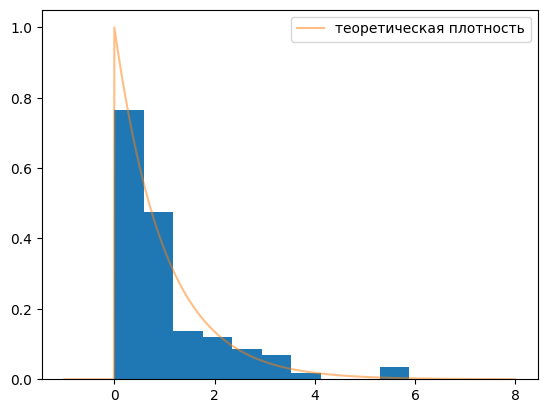

In [242]:
#plt.hist(expone_distrib, density=True, bins='auto')
b,n,_=plt.hist(expone, density=True)
x = np.linspace(-1,8,1000)
pdf = expone_distrib.pdf(x)
plt.plot(x, pdf, label='теоретическая плотность', alpha=0.5)
plt.legend()
print(b,n)

In [181]:
expone_mean=expone.mean()
print(expone_mean)
expone_var=expone.var()
print(expone_var)
expone_std=expone.std()
print(expone_std)

1.0158038063663553
1.4683036337484552
1.21173579370606


### Оценим распределение выборочного среднего для разных объёмов выборок
Для этого постройте на одном полотне гистограмму выборочных средних и теоретическое распределение выборочных средних по ЦПТ для разных объёмов выборок.

Для теоретического распределение используйте настоящие значения мат ожидания и дисперсии (не приближенные на основе выборки).

[ 0.24459097  0.12229549  0.48918195  1.46754584  1.10065938  3.30197814
  4.524933    6.48166079  9.53904795  8.56068406 12.35184415 13.81938999
 12.71873061 10.0282299   9.78363893  8.31609309  6.11477433  4.524933
  3.91345557  2.32361425  1.10065938  0.48918195  0.24459097  0.48918195
  0.12229549  0.12229549] [0.90067571 0.90885263 0.91702954 0.92520646 0.93338338 0.94156029
 0.94973721 0.95791412 0.96609104 0.97426796 0.98244487 0.99062179
 0.99879871 1.00697562 1.01515254 1.02332946 1.03150637 1.03968329
 1.04786021 1.05603712 1.06421404 1.07239096 1.08056787 1.08874479
 1.09692171 1.10509862 1.11327554]


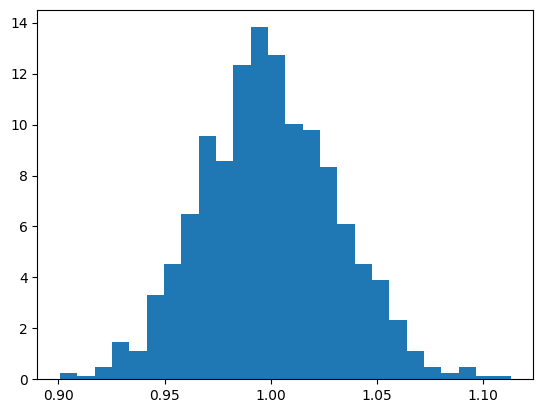

In [136]:
# Генерируем выборочные средние по экспоненциальной функции
N=1000
means_expon=[]
for i in range(1000):
    means_expon.append(np.mean(expone_distrib.rvs(N)))
b,n,_=plt.hist(means_expon, density=True, bins='auto')
print(b,n)

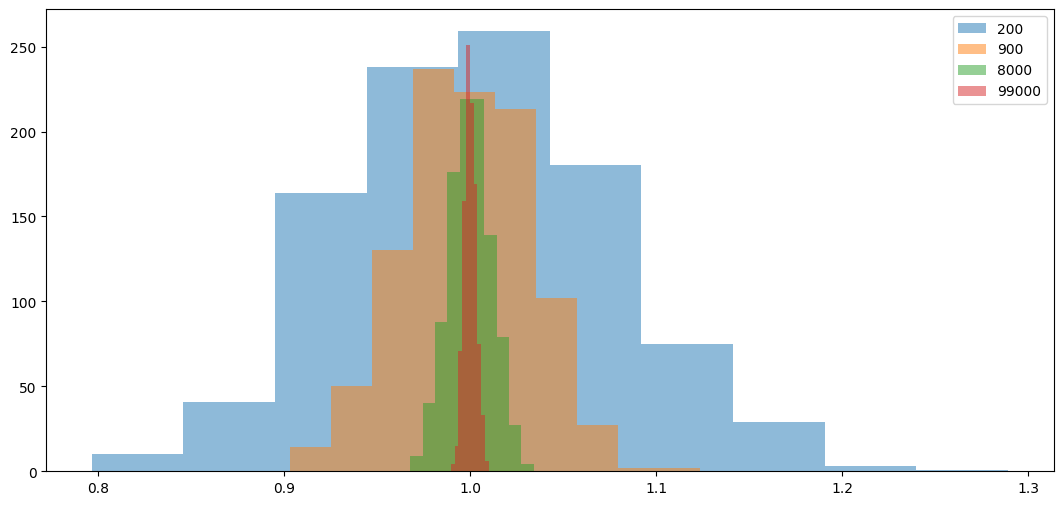

In [185]:
plt.figure(figsize=(13,6))
# сгенерируем много выборочных средних
for N in [200, 900, 8000, 99000]:
    means_expon = []
    for i in range(1000):
         means_expon.append(np.mean(expone_distrib.rvs(N)))
    plt.hist(means_expon, alpha=0.5)

plt.legend(['200', '900', '8000', '99000'])
plt.show()

In [232]:
expone_1=expone_distrib.rvs(100)
expone_2=expone_distrib.rvs(890)
expone_3=expone_distrib.rvs(15000)


[]

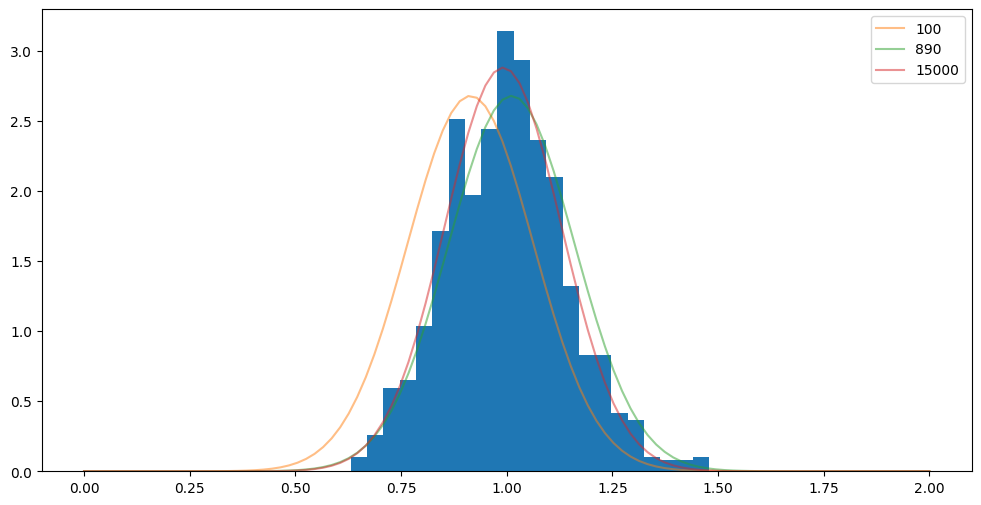

In [235]:
plt.figure(figsize=(12,6))
N = 50
# сгенерируем много выборочных средних
means_1 = []
for i in range(1000):
    means_1.append(np.mean(expone_distrib.rvs(N)))

means_1 = np.array(means_1).astype(np.float32)
plt.hist(means_1, density=True, bins='auto')
norm_rv_1 = sts.norm(loc=expone_1.mean(), scale=expone_2.std() / np.sqrt(N))
norm_rv_2 = sts.norm(loc=expone_2.mean(), scale=expone_2.std() / np.sqrt(N))
norm_rv_3 = sts.norm(loc=expone_3.mean(), scale=expone_3.std() / np.sqrt(N))
x_1 = np.linspace(0,2,100)
pdf_1 = norm_rv_1.pdf(x_1)
x_2 = np.linspace(0,2,100)
pdf_2 = norm_rv_2.pdf(x_2)
x_3 = np.linspace(0,2,100)
pdf_3 = norm_rv_3.pdf(x_3)
plt.plot(x_1, pdf_1, label='Теоретическая плотность_1', alpha=0.5)
plt.plot(x_2, pdf_2, label='Теоретическая плотность_2', alpha=0.5)
plt.plot(x_3, pdf_3, label='Теоретическая плотность_3', alpha=0.5)

plt.legend(['100','890','15000'],loc='upper right')
plt.plot()

0.9962321506396059 0.8820619993285622 0.9391815582349146


[]

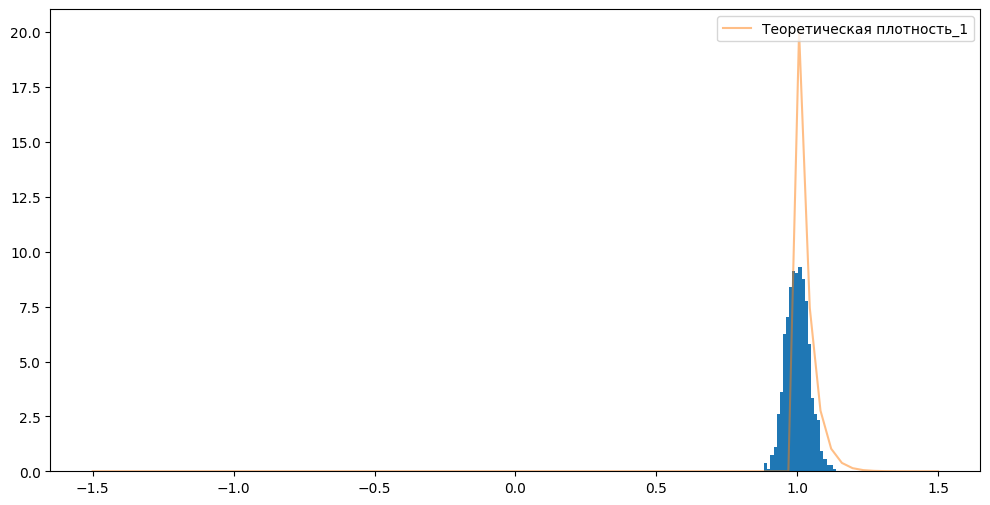

In [238]:
expone_4=expone_distrib.rvs(600)
mean=expone_4.mean()
var=expone_4.var()
std=expone_4.std()
print(mean,var,std)

plt.figure(figsize=(12,6))
N = 600
# сгенерируем много выборочных средних
means_4 = []
for i in range(1000):
    means_4.append(np.mean(expone_distrib.rvs(N)))
means_4 = np.array(means_4).astype(np.float32)
plt.hist(means_4, density=True, bins='auto')

# Теоретическое распределение
expone_rv = sts.expon(loc=expone_4.mean(), scale=expone_4.std() / np.sqrt(N))
x_4 = np.linspace(-1.5,1.5,80)
pdf_4 = expone_rv.pdf(x_4)

plt.plot(x_4, pdf_4, label='Теоретическая плотность_1', alpha=0.5)

plt.legend(loc='upper right')
plt.plot()

Как вы считаете, для выбранного распределения апроксимация распределения выборочного среднего работает хорошо или плохо? Ваш ответ: Работает хорошо.